In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
%matplotlib inline

In [2]:
#This read the data file for the survey.
data1=pd.read_csv('survey_results_public.csv', sep=",", header=0)
data1.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

## Question 1: Which Language is the Most Used?
In order to understand or answer this question, we will look **LanguageWorkedWith** and **LanguageDesireNextYear** fields. I created pandas series of the different response and the number of times we have each response. For **LanguageWorkedWith**, I created **language_used** and for **LanguageDesireNextYear**, I created **language_desire**.

In [3]:
# This read the column for the language worked with.
language_used=data1['LanguageWorkedWith'].value_counts().reset_index()
#language_used

In [4]:
# This read the column for the language desire to worked with.
language_desire=data1['LanguageDesireNextYear'].value_counts().reset_index()
#lang_desire

In [6]:
data1.shape[0]

88883

In [7]:
language_used.shape[0]

20098

<AxesSubplot:title={'center':'Programming Language Worked With '}, xlabel='index', ylabel='LanguageDesireNextYear'>

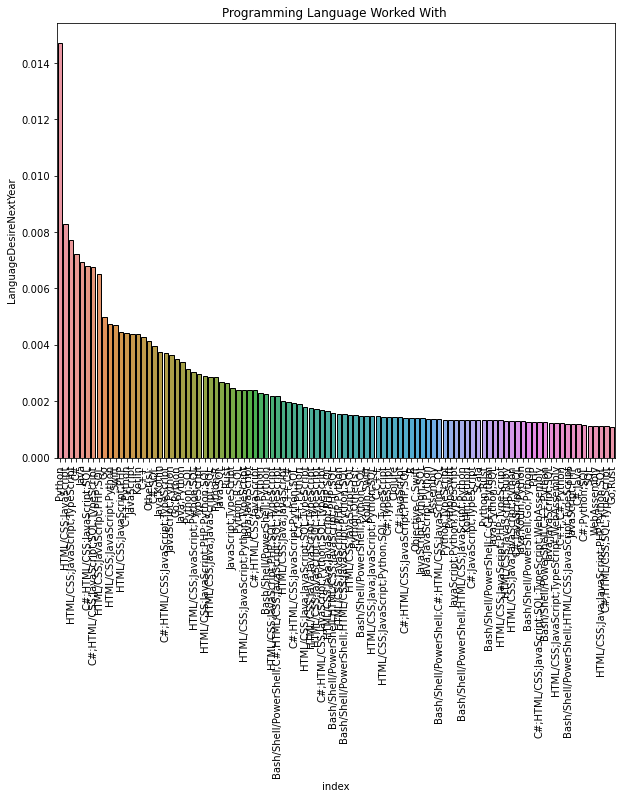

In [5]:
# The distribution of the answer given by each of the respondent is shown as a bar chart
# This code takes time to run

plt.figure(figsize=(10,8))
plt.title('Programming Language Worked With ')
plt.xticks(rotation=90)
sns.barplot(x=language_desire['index'][0:100],
            y=language_desire['LanguageDesireNextYear'][0:100]/sum(language_desire['LanguageDesireNextYear'])
            ,data=language_used,edgecolor='black')

## DATA CLEANING

Considering the bar chart above, there is need to clean up our data this is because each of the respondent has worked with more than one languages which are separated by semi-colon. So there is need to count each of the lrograming type seperately by spliting the answers and count the language type individually.
Another thing considered is that the total number of respondent is 88,883 but only 20,098 respondent to **LanguageWorkedWith** field and 27,259 **LanguageDesireNextYear** fields, so our analysis of the distribution will be base on this number of people.
Function **split_data** is use to clean up the data, by spliting or seperating the programming type and recordind the number of times it occur in the survey.

In [6]:
# The data for LanguageWorkedWith is clean up and the output is store as a dataframe named language_used_df

from collections import Counter
import functools, operator
def split_data(column_name1,
               column_name2,
               schema):
    '''
    INPUT:
    descrips - should be a set of the two columns your are considering in the dataset - each description should be a string.
    The first column must be the column for the list which is seperated by semi-colon, and the second column the count.
    The schema is the database where this data are.

    '''
    newarray=[]
    for index in range(schema.shape[0]):
        desc=schema[column_name1][index].split(';')
        for i in range(len(desc)):
            newarray.append({desc[i].strip():schema[column_name2][index]})
    result = dict(functools.reduce(operator.add,map(Counter, newarray)))
    finalresult=pd.DataFrame.from_dict(result, orient='index').reset_index()
    finalresult.columns=['Language Type', 'Count']
    
       
    return finalresult.sort_values(by=['Count'],ascending=False)
    '''
    OUTPUT:
    The output consist of a data frame, with the count of the value seperated with semi-colon in the column1 
    of the schema dataframe which is the inputed files.
    '''

language_used_df=split_data('index','LanguageWorkedWith',language_used)
#language_used_df

<AxesSubplot:title={'center':'Programming Language Worked With '}, xlabel='Language Type', ylabel='Count'>

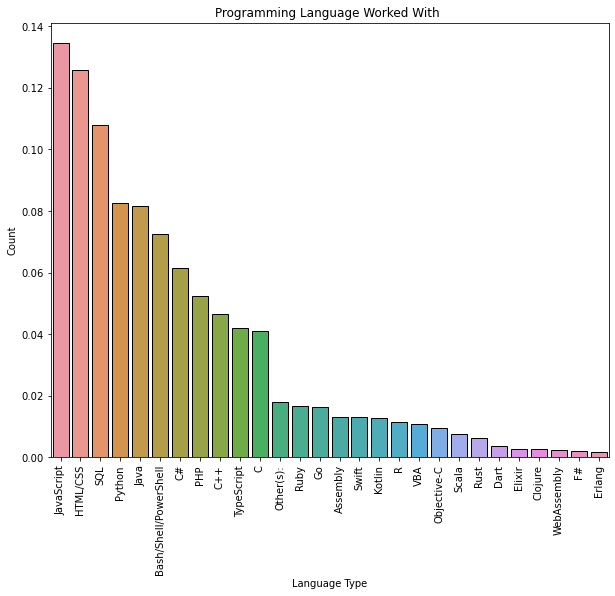

In [7]:
#Bar chart showing the distribution of the language worked 

plt.figure(figsize=(10,8))
plt.title('Programming Language Worked With ')
plt.xticks(rotation=90)
sns.barplot(x=language_used_df['Language Type'], 
            y=language_used_df['Count']/sum(language_used_df['Count']),
            data=language_used_df,edgecolor='black')

**1b**. This section create a series of data using column for **LanguageDesireNextYear**, the data is clean up using funtion **split_data** and the distribution is shown on a bar plot.

In [8]:
# This read the column for the language desire to worked with.
language_desire=data1['LanguageDesireNextYear'].value_counts().reset_index()
#lang_desire

In [9]:
from collections import Counter
import functools, operator
def split_data(column_name1,column_name2,schema):
    '''
    INPUT:
    descrips - should be a set of the two columns your are considering in the dataset - each description should be a string.
    The first column must be the column for the list which is seperated by semi-colon, and the second column the count.
    The schema is the database where this data are.

    '''
    newarray=[]
    for index in range(schema.shape[0]):
        desc=schema[column_name1][index].split(';')
        for i in range(len(desc)):
            newarray.append({desc[i].strip():schema[column_name2][index]})
    result = dict(functools.reduce(operator.add,map(Counter, newarray)))
    finalresult=pd.DataFrame.from_dict(result, orient='index').reset_index()
    finalresult.columns=['Language Desire', 'Count']
    
       
    return finalresult.sort_values(by=['Count'],ascending=False).reset_index().drop('index',axis=1)
'''
    OUTPUT:
    The output consist of a data frame, with the count of the value seperated with semi-colon in the column1 
    of the schema dataframe which is the inputed files.
    '''
language_desire_df=split_data('index','LanguageDesireNextYear',language_desire)


<AxesSubplot:title={'center':'Programming Language Desire to Work With '}, xlabel='Language Desire', ylabel='Count'>

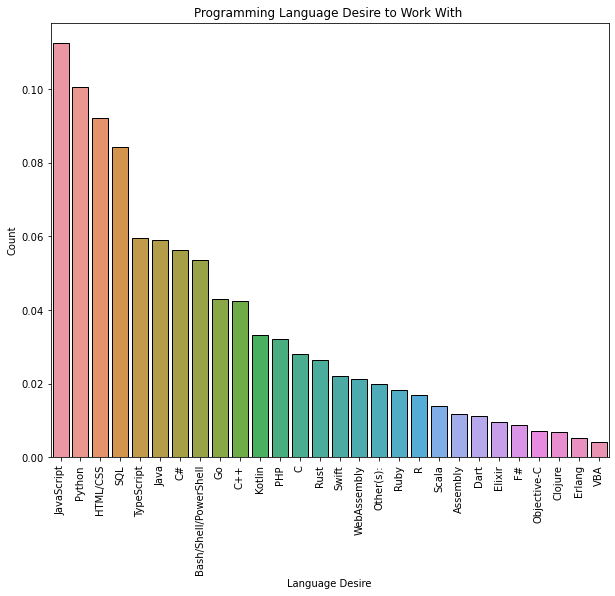

In [10]:
plt.figure(figsize=(10,8))
plt.title('Programming Language Desire to Work With ')
plt.xticks(rotation=90)
sns.barplot(x=language_desire_df['Language Desire'], 
            y=language_desire_df['Count']/sum(language_desire_df['Count']), 
            data=language_desire_df,edgecolor='black')

## RESULT PRESENTATION

#### Plot for the distribution of the language worked with and language desire to worked with.¶

<ipython-input-11-39484392e31f>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation = 90)
<ipython-input-11-39484392e31f>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation = 90)


<AxesSubplot:title={'center':'Programming Language Desire to Work With'}, xlabel='Language Desire', ylabel='Count'>

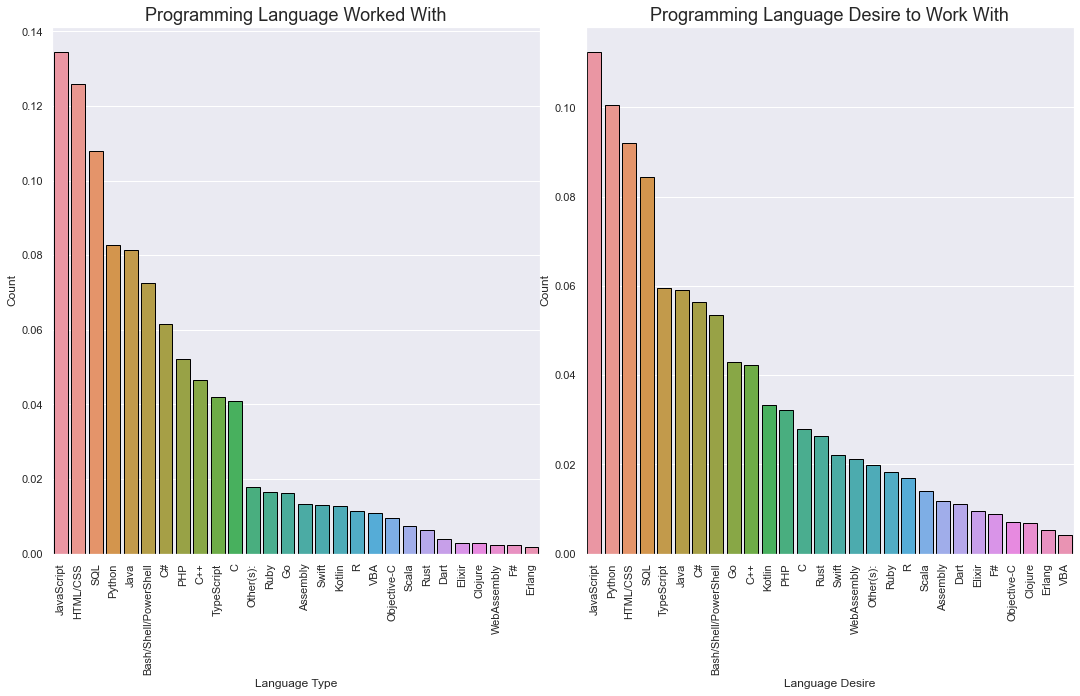

In [11]:
sns.set()
fig, axes = plt.subplots(1, 2,figsize=(15,8),sharey=False,sharex=False)

plt.tight_layout(h_pad=14.0)

axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation = 90)
axes[0].set_title('Programming Language Worked With', fontsize=18)
sns.barplot(ax=axes[0],x=language_used_df['Language Type'],
            y=language_used_df['Count']/sum(language_used_df['Count']),
            data=language_used_df,edgecolor='black')

axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation = 90)
axes[1].set_title('Programming Language Desire to Work With', fontsize=18)
sns.barplot(ax=axes[1],x=language_desire_df['Language Desire'], 
            y=language_desire_df['Count']/sum(language_desire_df['Count']), 
            data=language_desire_df,edgecolor='black')
#plt.savefig("LangType.jpeg",bbox_inches="tight")

## Question 2: Is Language Type Job Specific? 
To answer this question, we will look **LanguageWorkedWith** and **DevType fields**. I want to see the relationship between the language the respondets have worked with and their Job titles. I created pandas series of the different response under these two fields and droping all the missing rows. 



In [12]:
# This read the column for the language worked with and the job title type.
lang_dev=data1[['DevType','LanguageWorkedWith']]
np.sum(lang_dev.isnull()==1)

DevType               7548
LanguageWorkedWith    1314
dtype: int64

There are some missing data in **new_lang_dev**, there are some case where the respondents respond to the question **DevType**, but didn't respond to **LanguageWorkedWith**, so what I did is to drop all the row where we have missing value for the columns since we  are comparing the two together.

In [15]:
# This drop all the missing values
new_lang_dev=lang_dev.dropna().reset_index().drop('index',axis=1)

In [16]:
job_title=new_lang_dev['DevType'].value_counts().reset_index()
#job_title

## DATA CLEANING

I first used the **split_data** to clean up the data for **DevType** field by spliting or seperating the job title, and then record the number of times they occur in the survey.

In [17]:
# The data for DevType fields is clean up and the output is store as a dataframe named Job_df

from collections import Counter
import functools
import operator

def split_data(column_name1,
               column_name2,
               schema):
    '''
    INPUT:
    descrips - should be a set of the two columns your are considering in the dataset - each description should be a string.
    The first column must be the column for the list which is seperated by semi-colon, and the second column the count.
    The schema is the database where this data are.

    '''
    
    newarray=[]
    
    for index in range(schema.shape[0]):
        
        desc=schema[column_name1][index].split(';')
        
        for i in range(len(desc)):
            newarray.append({desc[i].strip():
                             schema[column_name2][index]})
            
    result = dict(functools.reduce(operator.add,map(Counter, newarray)))
    finalresult=pd.DataFrame.from_dict(result, orient='index').reset_index()
    finalresult.columns=['Job Type', 'Count']
    
       
    return finalresult.sort_values(by=['Count'],ascending=False)
    '''
    OUTPUT:
    The output consist of a data frame, with the count of the value seperated with semi-colon in the column1 
    of the schema dataframe which is the inputed files.
    '''
Job_df=split_data('index','DevType',job_title)
#Job_df

## DATA PREPARATION

I used the **separate_data** function to clean up the data for both fields, by spliting or seperating the job title, and then create a dictionary that makes the job title as the key and corresponding programming languages as the values.

In [18]:
from collections import Counter
import functools
import operator

def separate_data(column_name1,
               column_name2,
               schema):
    '''
    INPUT:
    descrips - should be a set of the two columns your considering in the dataset - each description should be a string.
    The first column must be the column for the list which is seperated by semi-colon, and the second column the count.
    The schema is the database where this data are.

    '''
    newarray=[]
    
    for index in range(schema.shape[0]):
        desc=schema[column_name1][index].split(';')
        
        for i in range(len(desc)):
            newarray.append({desc[i].strip():
                             schema[column_name2][index]})
#    print(newarray)
    return newarray
'''
    OUTPUT:
    The output consist of a list of dictionaries, with the job titles as the key and the programming languages as the value

    '''
newdata=separate_data('DevType','LanguageWorkedWith',new_lang_dev)
#newdata

This combined the different list in each diction for job title into one list, and speperate each programing language by semi-colon. I used function **merge_list_of_dictionaries** to achive this.

In [19]:
def merge_list_of_dictionaries(dict_list):
    '''
    
    Descrips - It takes in a dictionary, where the value per key contains different numbers of list. It join the
    lists to form a single one and seperate the items with a semi-colon.
    It produces a dataframe as the output.

    '''
    
    new_dict = {}
    
    for d in dict_list:
        for d_key in d:
            if d_key not in new_dict:
                new_dict[d_key] = []
                
            new_dict[d_key].append(d[d_key])
            
    for d in new_dict:
        d=d.strip()
        new_dict[d]=(';'.join(new_dict[d])) 
    rr= pd.DataFrame.from_dict(new_dict, orient='index').reset_index()   
    return rr

new_df=merge_list_of_dictionaries(newdata)
new_df.columns=['Job Title', 'Programming Type']
#new_df

Finally, function **Job_Title** takes in the job title, and first split the programing type and now count each programing type with reference to a particular job title. 

In [20]:

def Job_Title(job,job_column,
              prog_column,
              index_no,database):
    
    '''
    descrips - should be a set of the job title you want to consider, the column name for all the job title,
    column name for the programming types, the index number of the job title consider and the dataset 
    '''
    job_type=database[(database[job_column]==job)]
    job_type_split=job_type[prog_column].str.split(';')
    key=[]
    value=[]
    for i in set(job_type_split[index_no][:]):
    
        count=0
        for element in job_type_split[index_no][:]:
            if i ==element:
                count+=1
        key.append(i)        
        value.append(count)
    new_job_dict=dict(zip(key,value))
    new_job_type_df=pd.DataFrame.from_dict(new_job_dict, orient='index').reset_index()
    
    new_job_type_df.columns=['Programming Type', 'Count']
    new_job_type_df=new_job_type_df.sort_values(by=['Count'],ascending=False)
    return new_job_type_df

## RESULT PRESENTATION

In [21]:
Developer_front_end=Job_Title('Developer, front-end',
                              'Job Title',
                              'Programming Type',
                              1,new_df)

Developer_back_end=Job_Title('Developer, back-end',
                             'Job Title','Programming Type'
                             ,3,new_df)

Developer_full_stack=Job_Title('Developer, full-stack',
                               'Job Title','Programming Type'
                               ,4,new_df)

Developer_desktop_enterprise_applications=Job_Title('Developer, desktop or enterprise applications',
                                                    'Job Title','Programming Type',
                                                    0,new_df)

#### Plot for the distribution of the programing languages base on the job titles.

<ipython-input-22-0cb7ba75b931>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(),rotation = 90)
<ipython-input-22-0cb7ba75b931>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(),rotation = 90)
<ipython-input-22-0cb7ba75b931>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(),rotation = 90)
<ipython-input-22-0cb7ba75b931>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(),rotation = 90,)


<AxesSubplot:title={'center':'Developer,desktop or enterprise applications'}, xlabel='Programming Type', ylabel='Count'>

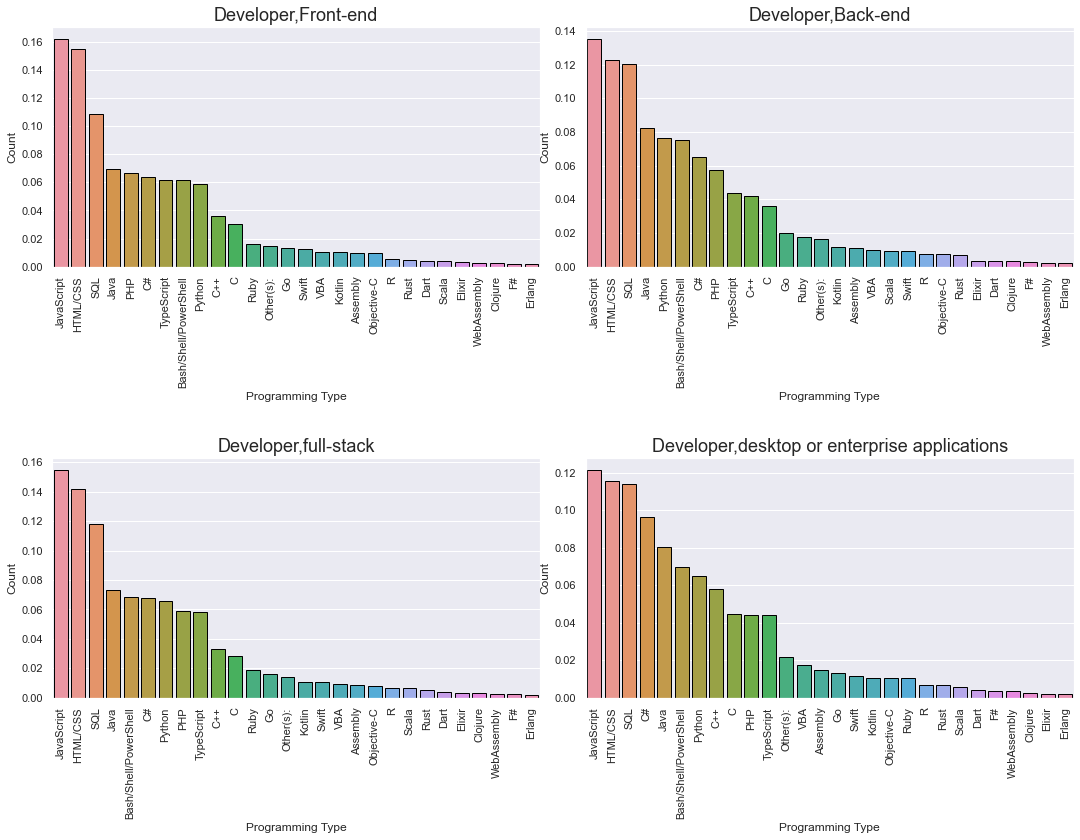

In [22]:
sns.set()
fig, axes = plt.subplots(2, 2,figsize=(15,10),sharey=False,sharex=False)
plt.tight_layout(h_pad=14.0)

axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(),rotation = 90)
axes[0,0].set_title('Developer,Front-end', fontsize=18)
sns.barplot(ax=axes[0,0],x=Developer_front_end['Programming Type'], 
            y=Developer_front_end['Count']/sum(Developer_front_end['Count']),
            data=Developer_front_end,edgecolor='black')

axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(),rotation = 90)
axes[0,1].set_title('Developer,Back-end', fontsize=18)
sns.barplot(ax=axes[0,1],x=Developer_back_end['Programming Type'],
            y=Developer_back_end['Count']/sum(Developer_back_end['Count']),
            data=Developer_back_end,edgecolor='black')

axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(),rotation = 90)
axes[1,0].set_title('Developer,full-stack', fontsize=18)
sns.barplot(ax=axes[1,0],x=Developer_full_stack['Programming Type'],
            y=Developer_full_stack['Count']/sum(Developer_full_stack['Count']),
            data=Developer_full_stack,edgecolor='black')

axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(),rotation = 90,)
axes[1,1].set_title('Developer,desktop or enterprise applications', fontsize=18)
sns.barplot(ax=axes[1,1],x=Developer_desktop_enterprise_applications['Programming Type'],
            y=Developer_desktop_enterprise_applications['Count']
            /sum(Developer_desktop_enterprise_applications['Count']),
            data=Developer_desktop_enterprise_applications,edgecolor='black')
#plt.savefig("Developer.jpeg",bbox_inches="tight")

In [23]:
Data_business_analyst=Job_Title('Data or business analyst','Job Title',
                                'Programming Type',7,new_df)

Data_scientist_machine_learning_specialist=Job_Title('Data scientist or machine learning specialist'
                                                     ,'Job Title','Programming Type',8,new_df)

Database_administrator=Job_Title('Database administrator','Job Title',
                                 'Programming Type',9,new_df)

Engineer_data=Job_Title('Engineer, data','Job Title',
                        'Programming Type',10,new_df)


<ipython-input-24-ab8ab6de959a>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(),rotation = 90)
<ipython-input-24-ab8ab6de959a>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(),rotation = 90)
<ipython-input-24-ab8ab6de959a>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(),rotation = 90)
<ipython-input-24-ab8ab6de959a>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(),rotation = 90)
<ipython-input-24-ab8ab6de959a>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(),rotation = 90)


<AxesSubplot:title={'center':'Engineer Data'}, xlabel='Programming Type', ylabel='Count'>

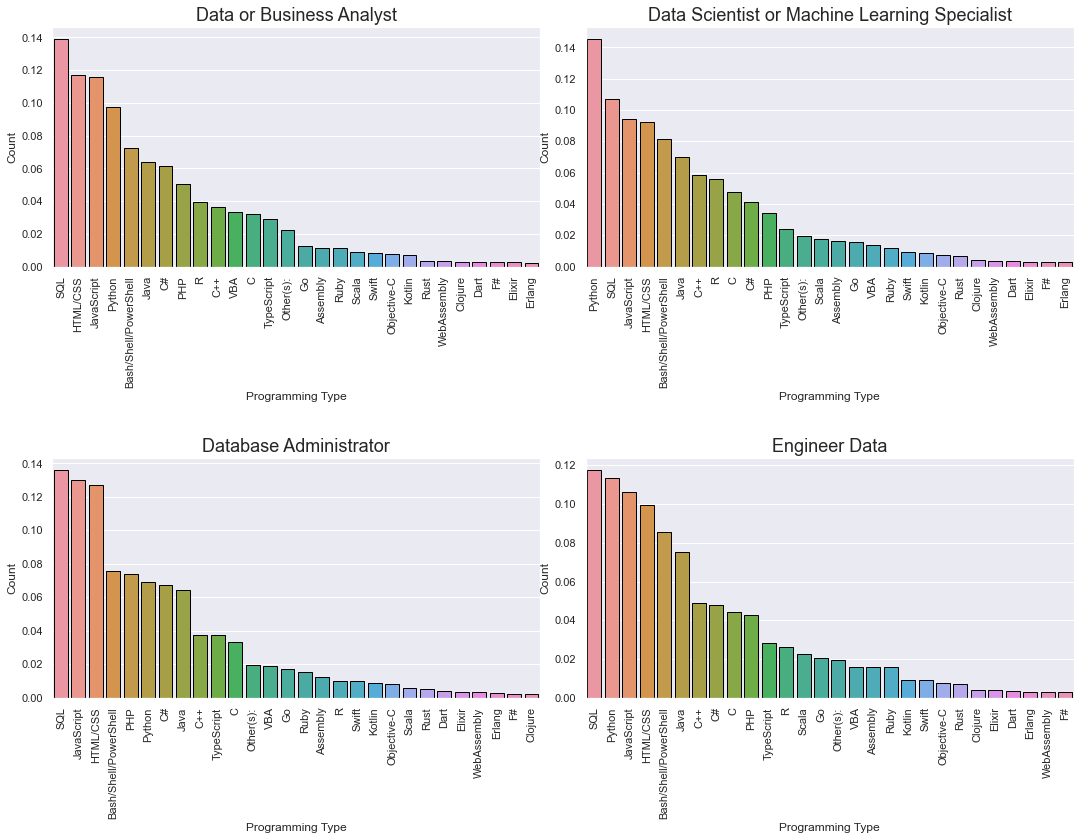

In [24]:
sns.set()
fig, axes = plt.subplots(2, 2,figsize=(15,10),sharey=False,sharex=False)
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(),rotation = 90)
plt.tight_layout(h_pad=14.0)

axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(),rotation = 90)
axes[0,0].set_title('Data or Business Analyst', fontsize=18)
sns.barplot(ax=axes[0,0],x=Data_business_analyst['Programming Type'],
            y=Data_business_analyst['Count']/sum(Data_business_analyst['Count']),
            data=Data_business_analyst,edgecolor='black')

axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(),rotation = 90)
axes[0,1].set_title('Data Scientist or Machine Learning Specialist', fontsize=18)
sns.barplot(ax=axes[0,1],x=Data_scientist_machine_learning_specialist['Programming Type'],
            y=Data_scientist_machine_learning_specialist['Count']
            /sum(Data_scientist_machine_learning_specialist['Count']),
            data=Data_scientist_machine_learning_specialist,edgecolor='black')

axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(),rotation = 90)
axes[1,0].set_title('Database Administrator', fontsize=18)
sns.barplot(ax=axes[1,0],x=Database_administrator['Programming Type'],
            y=Database_administrator['Count']/sum(Database_administrator['Count']),
            data=Database_administrator,edgecolor='black')

axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(),rotation = 90)
axes[1,1].set_title('Engineer Data', fontsize=18)
sns.barplot(ax=axes[1,1],x=Engineer_data['Programming Type'],
            y=Engineer_data['Count']/sum(Engineer_data['Count']),
            data=Engineer_data,edgecolor='black')

#plt.savefig("Data.jpeg",bbox_inches="tight")



## Question 3: Which database is the Most Used?
In order to understand or answer this question, we will look **DatabaseWorkedWith** field. I created pandas series **database_work** of the different response and the number of times we have each response. 

In [25]:
database_work=data1['DatabaseWorkedWith'].value_counts().reset_index()


In this section, the data is clean up using function **split_data** and the distribution is shown on a bar plot.

In [27]:
from collections import Counter
import functools, operator
def split_data(column_name1,column_name2,schema):
    
    '''
    INPUT:
    descrips - should be a set of the two columns your are considering in the dataset - each description should be a string.
    The first column must be the column for the list which is seperated by semi-colon, and the second column the count.
    The schema is the database where this data are.

    '''
    
    newarray=[]
    for index in range(schema.shape[0]):
        desc=schema[column_name1][index].split(';')
        for i in range(len(desc)):
            newarray.append({desc[i].strip():schema[column_name2][index]})
    result = dict(functools.reduce(operator.add,map(Counter, newarray)))
    finalresult=pd.DataFrame.from_dict(result, orient='index').reset_index()
    finalresult.columns=['Database', 'Count']
    
       
    return finalresult.sort_values(by=['Count'],ascending=False).reset_index().drop('index',axis=1)
    '''
    OUTPUT:
    The output consist of a data frame, with the count of the value seperated with semi-colon in the column1 
    of the schema dataframe which is the inputed files.
    '''
    
Database_work_df=split_data('index','DatabaseWorkedWith',database_work)
#Database_work_df

## RESULT PRESENTATION

<AxesSubplot:title={'center':'Database Worked With'}, xlabel='Database', ylabel='Count'>

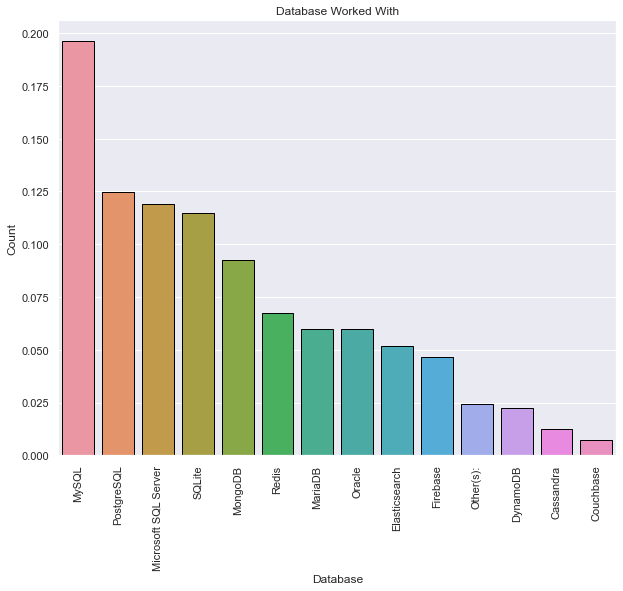

In [28]:
plt.figure(figsize=(10,8))
plt.title('Database Worked With')
plt.xticks(rotation=90)
sns.barplot(x=Database_work_df['Database'], 
            y=Database_work_df['Count']/sum(Database_work_df['Count']), 
            data=Database_work_df,edgecolor='black')
#plt.savefig("Database.jpeg",bbox_inches="tight")

## Conclusion

From the results of the analysis, it can be recommended for someone that want to be a developer to start with JavaScript why someone that is looking at becoming a data scientist or machine learning specialist can start with python.

In [ ]:
data2=pd.read_csv('survey_results_schema.csv', sep=",", header=0)
data2